In [1]:
# imports
import numpy as np
import math

import sys as sys
import os
import tkinter as tk
from tkinter import filedialog

#import matplotlib as mpl
import matplotlib.pyplot as plt
#import pylab as plb
import seaborn as sns
import pandas as pd

#from skimage import io
#from scipy.signal import argrelextrema, savgol_filter
#from scipy.optimize import curve_fit
#from scipy import exp
#from astropy import modeling
#import warnings
#from scipy.optimize import OptimizeWarning

#import time
import datetime as dt
import csv

%matplotlib inline

In [2]:
# options
zsave = True
zplot = True

In [3]:
# parameters
max_freq = 35 #[Hz] frequencies above this value are filtered out

In [4]:
# function for debugging
def pause():
    programPause = input('Press <ENTER> to continue.')

In [5]:
root = tk.Tk()
root.withdraw()

directory = filedialog.askdirectory(title = 'choose parent folder in which other folders incl. results are found format:.csv' ) 
os.chdir(directory)

In [6]:
#initialize
categories = []
cat_frequencies = []

#define categories
print('You will now input the categories to be analyzed.')
print('Ensure that you type the names as they are in the folder/file names that you select. They should match in terms of spelling, capitalization, and punctuation.')
print('If a file name is such that this file is included in two categories, its frequencies will also be included for both categories, so try to choose specific names.')
def relevant_categories(question):
    reply = str(input(question).strip())
    try:
        if reply == 'xxx':
            print('No further categories.')
            return False, 'No further categories.'
        else:
            categories.append(reply)
            cat_frequencies.append([])
            return relevant_categories(question)
    except Exception as error:
        print("Please enter a valid input")
        print(error)
        return relevant_categories(question)

answer, question = relevant_categories('Please enter the name of a category to analyze. If there are no further categories, enter xxx.')
print('Input categories are: ')    
print(categories)

You will now input the categories to be analyzed.
Ensure that you type the names as they are in the folder/file names that you select. They should match in terms of spelling, capitalization, and punctuation.
If a file name is such that this file is included in two categories, its frequencies will also be included for both categories, so try to choose specific names.


Please enter the name of a category to analyze. If there are no further categories, enter xxx. 20210222 HNEC0267 d21 40x_2
Please enter the name of a category to analyze. If there are no further categories, enter xxx. 20210222 HNEC0267 d21 40x_6
Please enter the name of a category to analyze. If there are no further categories, enter xxx. 20210222HNEC0267 d21 40x_3
Please enter the name of a category to analyze. If there are no further categories, enter xxx. 20210223 HNEC0267 ALI 40x_3
Please enter the name of a category to analyze. If there are no further categories, enter xxx. 20210223 HNEC0267 ALI 40x_6
Please enter the name of a category to analyze. If there are no further categories, enter xxx. 20210223 HNEC0267 ALI 40x_8
Please enter the name of a category to analyze. If there are no further categories, enter xxx. xxx


No further categories.
Input categories are: 
['20210222 HNEC0267 d21 40x_2', '20210222 HNEC0267 d21 40x_6', '20210222HNEC0267 d21 40x_3', '20210223 HNEC0267 ALI 40x_3', '20210223 HNEC0267 ALI 40x_6', '20210223 HNEC0267 ALI 40x_8']


In [7]:
for subdir, dirs, files in os.walk(directory):
    for file in files:
        if file == 'Frequency_list.csv':

            print(os.path.join(subdir, file))

            freq_file = open(os.path.join(subdir, file)) 
            line = freq_file.readline()

            for line in freq_file:
                for i in range(0,len(categories)):
                    if categories[i] in subdir:
                        cat_frequencies[i].append(float(line.strip('\n')))
            freq_file.close()

C:/Users/6182658/OneDrive - Universiteit Utrecht/Hetty movies/Submerge_Normal_compare\20210222 HNEC0267 d21 40x_2 STICS data\Results\Frequency_list.csv
C:/Users/6182658/OneDrive - Universiteit Utrecht/Hetty movies/Submerge_Normal_compare\20210222 HNEC0267 d21 40x_6 STICS data\Results\Frequency_list.csv
C:/Users/6182658/OneDrive - Universiteit Utrecht/Hetty movies/Submerge_Normal_compare\20210222HNEC0267 d21 40x_3 STICS data\Results\Frequency_list.csv
C:/Users/6182658/OneDrive - Universiteit Utrecht/Hetty movies/Submerge_Normal_compare\20210223 HNEC0267 ALI 40x_3 STICS data\Results\Frequency_list.csv
C:/Users/6182658/OneDrive - Universiteit Utrecht/Hetty movies/Submerge_Normal_compare\20210223 HNEC0267 ALI 40x_6 STICS data\Results\Frequency_list.csv
C:/Users/6182658/OneDrive - Universiteit Utrecht/Hetty movies/Submerge_Normal_compare\20210223 HNEC0267 ALI 40x_8 STICS data\Results\Frequency_list.csv


In [8]:
# remove duplicates of exactly same frequency to avoid over-counting cells? or normalize by image width and height?

In [9]:
# filter frequencies
for i in range(0,len(categories)):
    cat_frequencies[i][:] = [x for x in cat_frequencies[i] if x < max_freq]

In [10]:
data = {}
for i in range(0,len(categories)):
    data[categories[i]] = np.asarray(cat_frequencies[i])

maxsize = max([a.size for a in data.values()])
data_pad = {k:np.pad(v, pad_width=(0,maxsize-v.size,), mode='constant', constant_values=np.nan) for k,v in data.items()}

df = pd.DataFrame(data_pad)
df = pd.DataFrame (data=df, columns = categories)

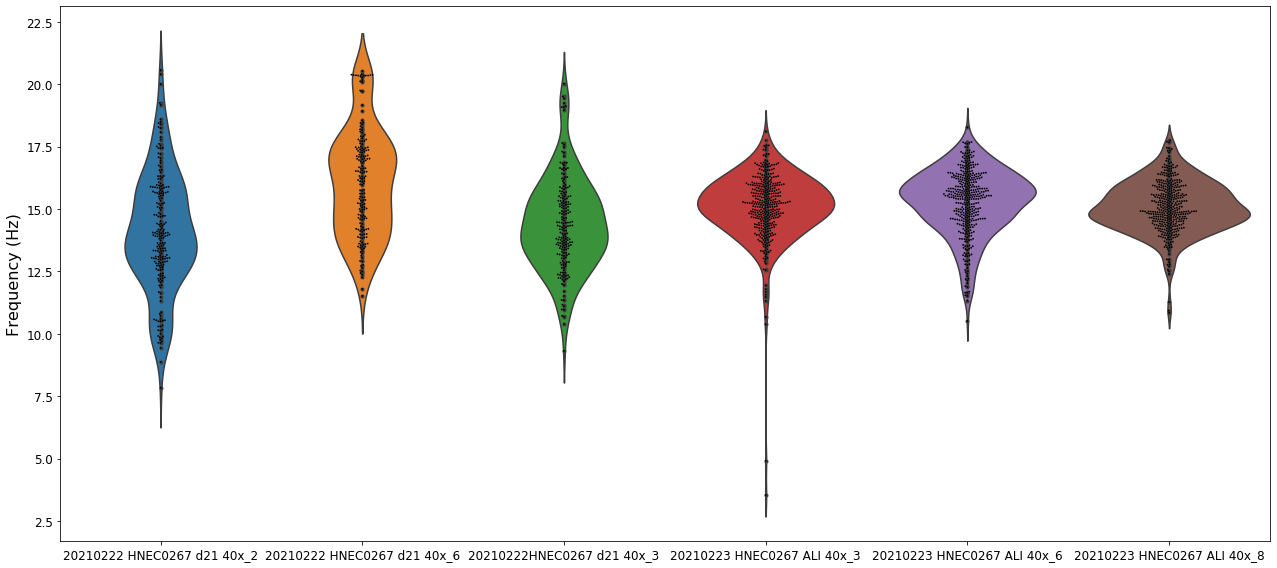

In [12]:
if zplot == True:
    plt.figure(figsize=(18,8))
    sns.violinplot(data=df, inner="points", orient="v")
    #b = sns.swarmplot(data = df, color = "w", orient="v", dodge = True, size = 5)
    b = sns.swarmplot(data = df, color = "k", orient="v", dodge = True, size = 1.8) #k = black, b = blue
    #b.axes.set_title("Title",fontsize=20)
    #b.set_xlabel("Control (patch)",fontsize=16)
    b.set_ylabel("Frequency (Hz)",fontsize=16)
    b.tick_params(labelsize=12)
    plt.tight_layout()
    
    # save fig
    if zsave == True:
        #script_dir = os.path.abspath('..') #os.path.dirname('..')
        results_dir = os.path.join(directory, 'Results/')
        file_name = 'CBF_distribution_violin_{}.png'.format(dt.datetime.now().strftime('%Y%m%d%H%M%S'))
        if not os.path.isdir(results_dir):    
            os.makedirs(results_dir)
        plt.savefig(results_dir + file_name,dpi=130)
        
    plt.show()